# Import

In [265]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load DataSet

In [285]:
data = pd.read_csv('train.csv')

In [286]:
data.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,hand
0,4,9,2,1,2,2,4,7,2,8,0
1,1,4,3,6,1,12,3,11,2,7,0
2,1,11,4,1,3,7,4,11,2,1,2
3,2,9,2,4,3,6,1,9,4,9,3
4,1,8,2,4,2,11,2,2,2,1,0


In [287]:
data[data.hand==9]

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,hand
10087,1,10,1,11,1,13,1,12,1,1,9
14886,4,1,4,13,4,12,4,11,4,10,9
15757,3,12,3,11,3,13,3,10,3,1,9
16718,4,10,4,11,4,1,4,13,4,12,9
23726,2,11,2,13,2,10,2,12,2,1,9


# Feature Engineering

In [288]:
y = data['hand']
X = data.drop('hand', axis = 1)

### Sort Cards

In [289]:
def sort_cards(data):
    
    cards_ind = ['C1','C2','C3','C4','C5']
    suits_ind = ['S1','S2','S3','S4','S5']  

    cards = data[cards_ind].get_values()
    cards.sort()

    sorted_cards = pd.DataFrame(cards,columns=cards_ind)
    sorted_data = data.drop(cards_ind,axis=1)
    sorted_data[cards_ind] = sorted_cards
    
    return sorted_data

In [290]:
sorted_card_data = sort_cards(X)

In [291]:
def sort_suits(data):
    
    cards_ind = ['C1','C2','C3','C4','C5']
    suits_ind = ['S1','S2','S3','S4','S5']  

    suits = data[suits_ind].get_values()
    suits.sort()

    sorted_suits = pd.DataFrame(suits,columns=suits_ind)
    sorted_data = data.drop(suits_ind,axis=1)
    sorted_data[suits_ind] = sorted_suits
    
    return sorted_data

In [292]:
sorted_data = sort_suits(sorted_card_data)


---------------------------------------------------------------

In [293]:
Suits_diff = sorted_data[suits_ind].max(axis=1) - sorted_data[suits_ind].min(axis=1)
Cards_std = sorted_data[cards_ind[:-1]].std(axis=1).astype(int)

In [294]:
#Suits_std = sorted_data[suits_ind].std(axis=1).astype(int)

In [295]:
sorted_data['Suits_diff'] = Suits_diff
sorted_data['Cards_std'] = Cards_std

In [298]:
X = sorted_data


## 4 new featuers Count of suits

In [173]:
Count_S1 = sorted_data[suits_ind[0]].map(0:1)

SyntaxError: invalid syntax (<ipython-input-173-1d7fd0cd547e>, line 1)

In [148]:
sorted_data[suits_ind].count(axis=1) 

KeyError: False

In [299]:
sorted_data.head()

,C1,C2,C3,C4,C5,S1,S2,S3,S4,S5,Suits_diff,Cards_std
0,1,2,7,8,9,2,2,2,4,4,2,3
1,4,6,7,11,12,1,1,2,3,3,2,2
2,1,1,7,11,11,1,2,3,4,4,3,4
3,4,6,9,9,9,1,2,2,3,4,3,2
4,1,2,4,8,11,1,2,2,2,2,1,3


In [300]:
y[y==9]

10087    9
14886    9
15757    9
16718    9
23726    9
Name: hand, dtype: int64

# Split Data

In [301]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [302]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(18757, 12)
(6253, 12)
(18757,)
(6253,)


# Choosing model

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LogisticRegression()
]


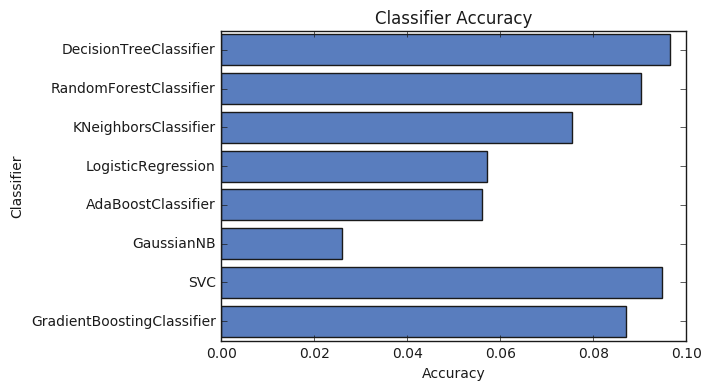

In [176]:
log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

acc_dict = {}

for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)

    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

In [ ]:
#dTree = DecisionTreeClassifier()
#dTree.fit(X_train, y_train)
#y_pred_class = dTree.predict(X_test)
#print(metrics.accuracy_score(y_test, y_pred_class))

In [303]:
dTree = DecisionTreeClassifier()
print(cross_val_score(dTree, X, y, cv=5, scoring='accuracy').mean())

0.969931874182


In [177]:
svc = SVC(probability=True)
print(cross_val_score(svc, X, y, cv=5, scoring='accuracy').mean())

0.950698954224


In [67]:
gradBoost =  GradientBoostingClassifier()
print(cross_val_score(gradBoost, X, y, cv=5, scoring='accuracy').mean())

0.887963966


In [68]:
randomForest =RandomForestClassifier()
print(cross_val_score(gradBoost, X, y, cv=5, scoring='accuracy').mean())

0.888043918029


In [69]:
import xgboost as xgb

In [304]:
gbm = xgb.XGBClassifier(
#learning_rate = 0.02,
n_estimators= 2000,
max_depth= 4,
min_child_weight= 2,
#gamma=1,
gamma=0.9,                        
subsample=0.8,
colsample_bytree=0.8,
objective= 'binary:logistic',
nthread= -1,
scale_pos_weight=1).fit(X_train, y_train)
predictions = gbm.predict(X_test)
print(metrics.accuracy_score(y_test, predictions))

0.988645450184


In [305]:
conf_mat = metrics.confusion_matrix(y_test, predictions)
print(conf_mat)

[[3187    0    0    0    0    0    0    0    0]
 [   0 2568    0    2    2    0    0    1    0]
 [   0   34  292    0    0    0    0    0    0]
 [   0   12    1  112    0    0    0    0    0]
 [  10    1    0    0   15    0    0    0    0]
 [   0    0    0    0    0    8    0    0    0]
 [   0    0    4    0    0    0    0    0    0]
 [   0    0    1    0    0    0    0    0    0]
 [   0    0    0    0    1    2    0    0    0]]


## Train model with all train set

In [306]:
gbm.fit(X, y)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0.9, learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=2, missing=None, n_estimators=2000, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8)

# Load Test DataSet

In [307]:
test_data = pd.read_csv('test.csv')

In [308]:
id_hand = test_data.id
test_data.drop('id',axis=1,inplace=True)

In [309]:
sorted_cards_test_data = sort_cards(test_data)
sorted_test_data = sort_suits(sorted_cards_test_data)

In [310]:
sorted_cards_test_data = sort_cards(test_data)
sorted_test_data = sort_suits(sorted_cards_test_data)

Suits_diff = sorted_test_data[suits_ind].max(axis=1) - sorted_test_data[suits_ind].min(axis=1)
Cards_std = sorted_test_data[cards_ind[:-1]].std(axis=1).astype(int)

sorted_test_data['Suits_diff'] = Suits_diff
sorted_test_data['Cards_std'] = Cards_std

In [311]:
sorted_test_data

,C1,C2,C3,C4,C5,S1,S2,S3,S4,S5,Suits_diff,Cards_std
0,1,2,3,8,10,1,1,2,3,3,2,3
1,4,5,6,7,13,1,2,3,3,4,3,1
2,1,3,4,8,11,1,1,2,2,2,1,2
3,3,6,7,8,11,1,1,3,3,4,3,2
4,4,6,6,10,12,1,2,2,2,3,2,2
5,4,6,7,10,11,1,1,2,2,3,2,2
6,4,8,9,10,11,1,1,3,3,3,2,2
7,1,3,8,11,11,1,1,2,2,3,2,4
8,1,3,4,5,6,1,1,3,3,3,2,1
9,1,2,3,10,12,1,1,2,3,3,2,4


# Final predict

In [312]:
predictions = gbm.predict(sorted_test_data)

# StackingSubmission

In [313]:
StackingSubmission = pd.DataFrame({'id': id_hand})
StackingSubmission['hand'] = predictions  

In [314]:
StackingSubmission.to_csv("StackingSubmission.csv", index=False)